# **CS224W - Colab 2**

In Colab 2, we will work to construct our own graph neural network using PyTorch Geometric (PyG) and then apply that model on two Open Graph Benchmark (OGB) datasets. These two datasets will be used to benchmark your model's performance on two different graph-based tasks: 1) node property prediction, predicting properties of single nodes and 2) graph property prediction, predicting properties of entire graphs or subgraphs.

First, we will learn how PyTorch Geometric stores graphs as PyTorch tensors.

Then, we will load and inspect one of the Open Graph Benchmark (OGB) datasets by using the `ogb` package. OGB is a collection of realistic, large-scale, and diverse benchmark datasets for machine learning on graphs. The `ogb` package not only provides data loaders for each dataset but also model evaluators.

Lastly, we will build our own graph neural network using PyTorch Geometric. We will then train and evaluate our model on the OGB node property prediction and graph property prediction tasks.

**Note**: Make sure to **sequentially run all the cells in each section**, so that the intermediate variables / packages will carry over to the next cell

We recommend you save a copy of this colab in your drive so you don't lose progress!

Have fun and good luck on Colab 2 :)

# Device
You might need to use a GPU for this Colab to run quickly.

Please click `Runtime` and then `Change runtime type`. Then set the `hardware accelerator` to **GPU**.

# Setup
As discussed in Colab 0, the installation of PyG on Colab can be a little bit tricky. First let us check which version of PyTorch you are running

In [1]:
import torch
import os
print("PyTorch has version {}".format(torch.__version__))

PyTorch has version 1.13.1


Download the necessary packages for PyG. Make sure that your version of torch matches the output from the cell above. In case of any issues, more information can be found on the [PyG's installation page](https://pytorch-geometric.readthedocs.io/en/latest/notes/installation.html).

In [2]:
# Install torch geometric
#if 'IS_GRADESCOPE_ENV' not in os.environ:
#  !pip install torch-scatter -f https://pytorch-geometric.com/whl/torch-1.9.0+cu111.html
#  !pip install torch-sparse -f https://pytorch-geometric.com/whl/torch-1.9.0+cu111.html
#  !pip install torch-geometric
!pip install ogb

# 1) PyTorch Geometric (Datasets and Data)


PyTorch Geometric has two classes for storing and/or transforming graphs into tensor format. One is `torch_geometric.datasets`, which contains a variety of common graph datasets. Another is `torch_geometric.data`, which provides the data handling of graphs in PyTorch tensors.

In this section, we will learn how to use `torch_geometric.datasets` and `torch_geometric.data` together.

## PyG Datasets

The `torch_geometric.datasets` class has many common graph datasets. Here we will explore its usage through one example dataset.

In [3]:
from torch_geometric.datasets import TUDataset

if 'IS_GRADESCOPE_ENV' not in os.environ:
  root = './enzymes'
  name = 'ENZYMES'

  # The ENZYMES dataset
  pyg_dataset= TUDataset(root, name)

  # You will find that there are 600 graphs in this dataset
  print(pyg_dataset)

ENZYMES(600)


## Question 1: What is the number of classes and number of features in the ENZYMES dataset? (5 points)

In [4]:
def get_num_classes(pyg_dataset):
  # TODO: Implement a function that takes a PyG dataset object
  # and returns the number of classes for that dataset.

  num_classes = pyg_dataset.num_classes

  ############# Your code here ############
  ## (~1 line of code)
  ## Note
  ## 1. Colab autocomplete functionality might be useful.

  #########################################

  return num_classes

def get_num_features(pyg_dataset):
  # TODO: Implement a function that takes a PyG dataset object
  # and returns the number of features for that dataset.

  num_features = pyg_dataset.num_features

  ############# Your code here ############
  ## (~1 line of code)
  ## Note
  ## 1. Colab autocomplete functionality might be useful.

  #########################################

  return num_features

if 'IS_GRADESCOPE_ENV' not in os.environ:
  num_classes = get_num_classes(pyg_dataset)
  num_features = get_num_features(pyg_dataset)
  print("{} dataset has {} classes".format(name, num_classes))
  print("{} dataset has {} features".format(name, num_features))

ENZYMES dataset has 6 classes
ENZYMES dataset has 3 features


## PyG Data

Each PyG dataset stores a list of `torch_geometric.data.Data` objects, where each `torch_geometric.data.Data` object represents a graph. We can easily get the `Data` object by indexing into the dataset.

For more information such as what is stored in the `Data` object, please refer to the [documentation](https://pytorch-geometric.readthedocs.io/en/latest/modules/data.html#torch_geometric.data.Data).

## Question 2: What is the label of the graph with index 100 in the ENZYMES dataset? (5 points)

In [5]:
def get_graph_class(pyg_dataset, idx):
  # TODO: Implement a function that takes a PyG dataset object,
  # an index of a graph within the dataset, and returns the class/label 
  # of the graph (as an integer).


  ############# Your code here ############
  ## (~1 line of code)
  label = pyg_dataset[idx].y[0]

  #########################################

  return label

# Here pyg_dataset is a dataset for graph classification
if 'IS_GRADESCOPE_ENV' not in os.environ:
  graph_0 = pyg_dataset[0]
  print(graph_0)
  idx = 100
  label = get_graph_class(pyg_dataset, idx)
  print('Graph with index {} has label {}'.format(idx, label))

Data(edge_index=[2, 168], x=[37, 3], y=[1])
Graph with index 100 has label 4


## Question 3: How many edges does the graph with index 200 have? (5 points)

In [6]:
def get_graph_num_edges(pyg_dataset, idx):
  # TODO: Implement a function that takes a PyG dataset object,
  # the index of a graph in the dataset, and returns the number of 
  # edges in the graph (as an integer). You should not count an edge 
  # twice if the graph is undirected. For example, in an undirected 
  # graph G, if two nodes v and u are connected by an edge, this edge
  # should only be counted once.


  ############# Your code here ############
  ## Note:
  ## 1. You can't return the data.num_edges directly
  ## 2. We assume the graph is undirected
  ## 3. Look at the PyG dataset built in functions
  ## (~4 lines of code)
  num_edges = pyg_dataset[idx].edge_index.shape[1]//2

  #########################################

  return num_edges

if 'IS_GRADESCOPE_ENV' not in os.environ:
  idx = 200
  num_edges = get_graph_num_edges(pyg_dataset, idx)
  print('Graph with index {} has {} edges'.format(idx, num_edges))

Graph with index 200 has 53 edges


# 2) Open Graph Benchmark (OGB)

The Open Graph Benchmark (OGB) is a collection of realistic, large-scale, and diverse benchmark datasets for machine learning on graphs. Its datasets are automatically downloaded, processed, and split using the OGB Data Loader. The model performance can then be evaluated by using the OGB Evaluator in a unified manner.

## Dataset and Data

OGB also supports PyG dataset and data classes. Here we take a look on the `ogbn-arxiv` dataset.

In [7]:
import torch_geometric.transforms as T
from ogb.nodeproppred import PygNodePropPredDataset

if 'IS_GRADESCOPE_ENV' not in os.environ:
  dataset_name = 'ogbn-arxiv'
  # Load the dataset and transform it to sparse tensor
  dataset = PygNodePropPredDataset(name=dataset_name,
                                  transform=T.ToSparseTensor())
  print('The {} dataset has {} graph'.format(dataset_name, len(dataset)))

  # Extract the graph
  data = dataset[0]
  print(data)

The ogbn-arxiv dataset has 1 graph
Data(num_nodes=169343, x=[169343, 128], node_year=[169343, 1], y=[169343, 1], adj_t=[169343, 169343, nnz=1166243])


## Question 4: How many features are in the ogbn-arxiv graph? (5 points)

In [8]:
def graph_num_features(data):
  # TODO: Implement a function that takes a PyG data object,
  # and returns the number of features in the graph (as an integer).


  ############# Your code here ############
  ## (~1 line of code)
  num_features = data.num_features

  #########################################

  return num_features

if 'IS_GRADESCOPE_ENV' not in os.environ:
  num_features = graph_num_features(data)
  print('The graph has {} features'.format(num_features))

The graph has 128 features


# 3) GNN: Node Property Prediction

In this section we will build our first graph neural network using PyTorch Geometric. Then we will apply it to the task of node property prediction (node classification).

Specifically, we will use GCN as the foundation for your graph neural network ([Kipf et al. (2017)](https://arxiv.org/pdf/1609.02907.pdf)). To do so, we will work with PyG's built-in `GCNConv` layer. 

## Setup

In [9]:
import torch
import pandas as pd
import torch.nn.functional as F
print(torch.__version__)

# The PyG built-in GCNConv
from torch_geometric.nn import GCNConv

import torch_geometric.transforms as T
from ogb.nodeproppred import PygNodePropPredDataset, Evaluator

1.13.1


## Load and Preprocess the Dataset

In [10]:
if 'IS_GRADESCOPE_ENV' not in os.environ:
  dataset_name = 'ogbn-arxiv'
  dataset = PygNodePropPredDataset(name=dataset_name,
                                  transform=T.ToSparseTensor())
  data = dataset[0]

  # Make the adjacency matrix to symmetric
  data.adj_t = data.adj_t.to_symmetric()

  device = 'cuda' if torch.cuda.is_available() else 'cpu'

  # If you use GPU, the device should be cuda
  print('Device: {}'.format(device))

  data = data.to(device)
  split_idx = dataset.get_idx_split()
  train_idx = split_idx['train'].to(device)

Device: cuda


## GCN Model

Now we will implement our GCN model!

Please follow the figure below to implement the `forward` function.


![test](https://drive.google.com/uc?id=128AuYAXNXGg7PIhJJ7e420DoPWKb-RtL)

In [11]:
class GCN(torch.nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, num_layers,
                 dropout, return_embeds=False):
        # TODO: Implement a function that initializes self.convs, 
        # self.bns, and self.softmax.

        super(GCN, self).__init__()

        # A list of GCNConv layers
        self.convs = None

        # A list of 1D batch normalization layers
        self.bns = None

        # The log softmax layer
        self.softmax = None

        ############# Your code here ############
        ## Note:
        ## 1. You should use torch.nn.ModuleList for self.convs and self.bns
        ## 2. self.convs has num_layers GCNConv layers
        ## 3. self.bns has num_layers - 1 BatchNorm1d layers
        ## 4. You should use torch.nn.LogSoftmax for self.softmax
        ## 5. The parameters you can set for GCNConv include 'in_channels' and 
        ## 'out_channels'. For more information please refer to the documentation:
        ## https://pytorch-geometric.readthedocs.io/en/latest/modules/nn.html#torch_geometric.nn.conv.GCNConv
        ## 6. The only parameter you need to set for BatchNorm1d is 'num_features'
        ## For more information please refer to the documentation: 
        ## https://pytorch.org/docs/stable/generated/torch.nn.BatchNorm1d.html
        ## (~10 lines of code)
        self.convs = torch.nn.ModuleList([GCNConv(input_dim, hidden_dim)] + 
                                         [GCNConv(hidden_dim,hidden_dim) for _ in range(num_layers-2)]+
                                         [GCNConv(hidden_dim,output_dim)])
        self.bns = torch.nn.ModuleList([torch.nn.BatchNorm1d(hidden_dim) for i in range(num_layers-1)])
        self.softmax = torch.nn.LogSoftmax()

        #########################################

        # Probability of an element getting zeroed
        self.dropout = dropout

        # Skip classification layer and return node embeddings
        self.return_embeds = return_embeds

    def reset_parameters(self):
        for conv in self.convs:
            conv.reset_parameters()
        for bn in self.bns:
            bn.reset_parameters()

    def forward(self, x, adj_t):
        # TODO: Implement a function that takes the feature tensor x and
        # edge_index tensor adj_t and returns the output tensor as
        # shown in the figure.

        out = None

        ############# Your code here ############
        ## Note:
        ## 1. Construct the network as shown in the figure
        ## 2. torch.nn.functional.relu and torch.nn.functional.dropout are useful
        ## For more information please refer to the documentation:
        ## https://pytorch.org/docs/stable/nn.functional.html
        ## 3. Don't forget to set F.dropout training to self.training
        ## 4. If return_embeds is True, then skip the last softmax layer
        ## (~7 lines of code)
        for i in range(len(self.bns)):
            x=self.convs[i](x,adj_t)
            x=self.bns[i](x)
            x=F.relu(x)
            x=F.dropout(x,p=self.dropout, training=self.training)
        x=self.convs[-1](x,adj_t)
        if not self.return_embeds:
            x=self.softmax(x)
        out=x

        #########################################

        return out


In [12]:
def train(model, data, train_idx, optimizer, loss_fn):
    # TODO: Implement a function that trains the model by 
    # using the given optimizer and loss_fn.
    model.train()
    loss = 0

    ############# Your code here ############
    ## Note:
    ## 1. Zero grad the optimizer
    ## 2. Feed the data into the model
    ## 3. Slice the model output and label by train_idx
    ## 4. Feed the sliced output and label to loss_fn
    ## (~4 lines of code)
    optimizer.zero_grad()
    out = model(data.x, data.adj_t)
    loss = loss_fn(out[train_idx], torch.flatten(data.y[train_idx])) 

    #########################################

    loss.backward()
    optimizer.step()

    return loss.item(), out

In [13]:
# Test function here
@torch.no_grad()
def test(model, data, split_idx, evaluator, save_model_results=False):
    # TODO: Implement a function that tests the model by 
    # using the given split_idx and evaluator.
    model.eval()

    # The output of model on all data
    out = None

    ############# Your code here ############
    ## (~1 line of code)
    ## Note:
    ## 1. No index slicing here
    out = model(data.x, data.adj_t)

    #########################################

    y_pred = out.argmax(dim=-1, keepdim=True)

    train_acc = evaluator.eval({
        'y_true': data.y[split_idx['train']],
        'y_pred': y_pred[split_idx['train']],
    })['acc']
    valid_acc = evaluator.eval({
        'y_true': data.y[split_idx['valid']],
        'y_pred': y_pred[split_idx['valid']],
    })['acc']
    test_acc = evaluator.eval({
        'y_true': data.y[split_idx['test']],
        'y_pred': y_pred[split_idx['test']],
    })['acc']

    if save_model_results:
      print ("Saving Model Predictions")

      data = {}
      data['y_pred'] = y_pred.view(-1).cpu().detach().numpy()

      df = pd.DataFrame(data=data)
      # Save locally as csv
      df.to_csv('ogbn-arxiv_node.csv', sep=',', index=False)


    return train_acc, valid_acc, test_acc

In [14]:
# Please do not change the args
if 'IS_GRADESCOPE_ENV' not in os.environ:
  args = {
      'device': device,
      'num_layers': 3,
      'hidden_dim': 256,
      'dropout': 0.5,
      'lr': 0.01,
      'epochs':100,
  }
  args

In [15]:
if 'IS_GRADESCOPE_ENV' not in os.environ:
    model = GCN(data.num_features, args['hidden_dim'],
              dataset.num_classes, args['num_layers'],
              args['dropout']).to(device)
    evaluator = Evaluator(name='ogbn-arxiv')
print(model)

GCN(
  (convs): ModuleList(
    (0): GCNConv(128, 256)
    (1): GCNConv(256, 256)
    (2): GCNConv(256, 40)
  )
  (bns): ModuleList(
    (0): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (softmax): LogSoftmax(dim=None)
)


In [28]:
import copy
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np

idx = torch.randint(0, out.shape[0], (1500,))

def plt2arr(fig):
    rgb_str = fig.canvas.tostring_rgb()
    (w,h) = fig.canvas.get_width_height()
    rgba_arr = np.fromstring(rgb_str, dtype=np.uint8, sep='').reshape((w,h,-1))
    return rgba_arr


def visualize(h, color, epoch):
    global idx
    fig = plt.figure(figsize=(5,5), frameon=False)
    fig.suptitle(f'Epoch = {epoch}')
    # Fit TSNE with 2 components
    h=h[idx]
    color = color[idx]
    z = TSNE(n_components=2).fit_transform(h.detach().cpu().numpy())

    # Create scatterplot from embeddings
    plt.xticks([])
    plt.yticks([])
    plt.scatter(z[:, 0], 
                z[:, 1], 
                s=70, 
                c=color.detach().cpu().numpy(), 
                cmap="Set2")
    fig.canvas.draw()

    # Convert to numpy
    return plt2arr(fig)



/tmp/ipykernel_411038/583901380.py:74: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  x=self.softmax(x)


Epoch: 01, Loss: 3.9857, Train: 11.08%, Valid: 22.98% Test: 21.56%
Epoch: 02, Loss: 2.2975, Train: 8.91%, Valid: 15.85% Test: 22.65%
Epoch: 03, Loss: 1.9624, Train: 30.45%, Valid: 35.79% Test: 40.27%
Epoch: 04, Loss: 1.7388, Train: 45.07%, Valid: 47.70% Test: 43.88%


/home/deniz/anaconda3/envs/rl/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/deniz/anaconda3/envs/rl/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/tmp/ipykernel_411038/676977951.py:11: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  rgba_arr = np.fromstring(rgb_str, dtype=np.uint8, sep='').reshape((w,h,-1))
/tmp/ipykernel_411038/583901380.py:74: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  x=self.softmax(x)


Epoch: 05, Loss: 1.6340, Train: 44.21%, Valid: 43.54% Test: 41.44%
Epoch: 06, Loss: 1.5429, Train: 38.23%, Valid: 29.71% Test: 29.68%
Epoch: 07, Loss: 1.4825, Train: 38.10%, Valid: 24.59% Test: 21.98%
Epoch: 08, Loss: 1.4348, Train: 39.26%, Valid: 25.36% Test: 22.76%
Epoch: 09, Loss: 1.3921, Train: 40.33%, Valid: 30.35% Test: 30.66%


/home/deniz/anaconda3/envs/rl/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/deniz/anaconda3/envs/rl/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/tmp/ipykernel_411038/676977951.py:11: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  rgba_arr = np.fromstring(rgb_str, dtype=np.uint8, sep='').reshape((w,h,-1))
/tmp/ipykernel_411038/583901380.py:74: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  x=self.softmax(x)


Epoch: 10, Loss: 1.3611, Train: 43.85%, Valid: 43.59% Test: 47.91%
Epoch: 11, Loss: 1.3292, Train: 46.19%, Valid: 46.91% Test: 51.00%
Epoch: 12, Loss: 1.3046, Train: 46.63%, Valid: 46.10% Test: 50.12%
Epoch: 13, Loss: 1.2830, Train: 47.19%, Valid: 45.72% Test: 49.78%
Epoch: 14, Loss: 1.2603, Train: 48.19%, Valid: 46.47% Test: 50.63%


/home/deniz/anaconda3/envs/rl/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/deniz/anaconda3/envs/rl/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/tmp/ipykernel_411038/676977951.py:11: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  rgba_arr = np.fromstring(rgb_str, dtype=np.uint8, sep='').reshape((w,h,-1))
/tmp/ipykernel_411038/583901380.py:74: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  x=self.softmax(x)


Epoch: 15, Loss: 1.2435, Train: 49.67%, Valid: 48.44% Test: 52.15%
Epoch: 16, Loss: 1.2234, Train: 51.34%, Valid: 51.38% Test: 54.66%
Epoch: 17, Loss: 1.2125, Train: 53.40%, Valid: 54.67% Test: 57.74%
Epoch: 18, Loss: 1.1962, Train: 55.14%, Valid: 57.13% Test: 60.03%
Epoch: 19, Loss: 1.1863, Train: 56.67%, Valid: 58.88% Test: 61.15%


/home/deniz/anaconda3/envs/rl/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/deniz/anaconda3/envs/rl/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/tmp/ipykernel_411038/676977951.py:11: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  rgba_arr = np.fromstring(rgb_str, dtype=np.uint8, sep='').reshape((w,h,-1))
/tmp/ipykernel_411038/583901380.py:74: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  x=self.softmax(x)


Epoch: 20, Loss: 1.1733, Train: 57.46%, Valid: 59.94% Test: 61.54%
Epoch: 21, Loss: 1.1579, Train: 58.55%, Valid: 60.67% Test: 62.08%
Epoch: 22, Loss: 1.1519, Train: 60.08%, Valid: 61.66% Test: 62.87%
Epoch: 23, Loss: 1.1414, Train: 61.70%, Valid: 62.78% Test: 63.66%
Epoch: 24, Loss: 1.1282, Train: 63.09%, Valid: 63.83% Test: 64.61%


/home/deniz/anaconda3/envs/rl/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/deniz/anaconda3/envs/rl/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/tmp/ipykernel_411038/676977951.py:11: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  rgba_arr = np.fromstring(rgb_str, dtype=np.uint8, sep='').reshape((w,h,-1))
/tmp/ipykernel_411038/583901380.py:74: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  x=self.softmax(x)


Epoch: 25, Loss: 1.1236, Train: 64.15%, Valid: 65.10% Test: 65.44%
Epoch: 26, Loss: 1.1113, Train: 65.01%, Valid: 66.00% Test: 66.06%
Epoch: 27, Loss: 1.1083, Train: 65.65%, Valid: 66.68% Test: 66.60%
Epoch: 28, Loss: 1.0998, Train: 66.21%, Valid: 66.99% Test: 66.70%
Epoch: 29, Loss: 1.0914, Train: 66.81%, Valid: 67.09% Test: 67.04%


/home/deniz/anaconda3/envs/rl/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/deniz/anaconda3/envs/rl/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/tmp/ipykernel_411038/676977951.py:11: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  rgba_arr = np.fromstring(rgb_str, dtype=np.uint8, sep='').reshape((w,h,-1))
/tmp/ipykernel_411038/583901380.py:74: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  x=self.softmax(x)


Epoch: 30, Loss: 1.0863, Train: 67.23%, Valid: 67.27% Test: 67.69%
Epoch: 31, Loss: 1.0785, Train: 67.58%, Valid: 67.42% Test: 68.01%
Epoch: 32, Loss: 1.0729, Train: 67.87%, Valid: 67.64% Test: 68.05%
Epoch: 33, Loss: 1.0668, Train: 68.13%, Valid: 67.95% Test: 68.06%
Epoch: 34, Loss: 1.0627, Train: 68.23%, Valid: 67.99% Test: 67.90%


/home/deniz/anaconda3/envs/rl/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/deniz/anaconda3/envs/rl/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/tmp/ipykernel_411038/676977951.py:11: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  rgba_arr = np.fromstring(rgb_str, dtype=np.uint8, sep='').reshape((w,h,-1))
/tmp/ipykernel_411038/583901380.py:74: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  x=self.softmax(x)


Epoch: 35, Loss: 1.0582, Train: 68.37%, Valid: 67.88% Test: 67.50%
Epoch: 36, Loss: 1.0551, Train: 68.65%, Valid: 68.15% Test: 67.78%
Epoch: 37, Loss: 1.0496, Train: 69.01%, Valid: 68.68% Test: 68.32%
Epoch: 38, Loss: 1.0463, Train: 69.30%, Valid: 69.06% Test: 68.77%
Epoch: 39, Loss: 1.0423, Train: 69.60%, Valid: 69.38% Test: 68.71%


/home/deniz/anaconda3/envs/rl/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/deniz/anaconda3/envs/rl/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/tmp/ipykernel_411038/676977951.py:11: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  rgba_arr = np.fromstring(rgb_str, dtype=np.uint8, sep='').reshape((w,h,-1))
/tmp/ipykernel_411038/583901380.py:74: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  x=self.softmax(x)


Epoch: 40, Loss: 1.0358, Train: 69.80%, Valid: 69.22% Test: 68.22%
Epoch: 41, Loss: 1.0279, Train: 69.99%, Valid: 69.03% Test: 67.97%
Epoch: 42, Loss: 1.0296, Train: 70.23%, Valid: 69.27% Test: 68.29%
Epoch: 43, Loss: 1.0266, Train: 70.52%, Valid: 69.61% Test: 68.57%
Epoch: 44, Loss: 1.0217, Train: 70.64%, Valid: 69.66% Test: 68.48%


/home/deniz/anaconda3/envs/rl/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/deniz/anaconda3/envs/rl/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/tmp/ipykernel_411038/676977951.py:11: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  rgba_arr = np.fromstring(rgb_str, dtype=np.uint8, sep='').reshape((w,h,-1))
/tmp/ipykernel_411038/583901380.py:74: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  x=self.softmax(x)


Epoch: 45, Loss: 1.0175, Train: 70.77%, Valid: 69.69% Test: 68.55%
Epoch: 46, Loss: 1.0141, Train: 70.86%, Valid: 69.73% Test: 68.61%
Epoch: 47, Loss: 1.0105, Train: 70.90%, Valid: 69.69% Test: 68.57%
Epoch: 48, Loss: 1.0088, Train: 70.95%, Valid: 69.64% Test: 68.34%
Epoch: 49, Loss: 1.0055, Train: 71.09%, Valid: 69.71% Test: 68.29%


/home/deniz/anaconda3/envs/rl/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/deniz/anaconda3/envs/rl/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/tmp/ipykernel_411038/676977951.py:11: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  rgba_arr = np.fromstring(rgb_str, dtype=np.uint8, sep='').reshape((w,h,-1))
/tmp/ipykernel_411038/583901380.py:74: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  x=self.softmax(x)


Epoch: 50, Loss: 1.0029, Train: 71.16%, Valid: 69.89% Test: 68.55%
Epoch: 51, Loss: 0.9968, Train: 71.26%, Valid: 69.86% Test: 68.42%
Epoch: 52, Loss: 0.9948, Train: 71.36%, Valid: 70.14% Test: 68.88%
Epoch: 53, Loss: 0.9911, Train: 71.49%, Valid: 70.39% Test: 69.52%
Epoch: 54, Loss: 0.9911, Train: 71.56%, Valid: 70.51% Test: 69.54%


/home/deniz/anaconda3/envs/rl/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/deniz/anaconda3/envs/rl/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/tmp/ipykernel_411038/676977951.py:11: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  rgba_arr = np.fromstring(rgb_str, dtype=np.uint8, sep='').reshape((w,h,-1))
/tmp/ipykernel_411038/583901380.py:74: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  x=self.softmax(x)


Epoch: 55, Loss: 0.9870, Train: 71.55%, Valid: 70.07% Test: 68.49%
Epoch: 56, Loss: 0.9835, Train: 71.65%, Valid: 69.84% Test: 68.13%
Epoch: 57, Loss: 0.9830, Train: 71.82%, Valid: 70.20% Test: 68.67%
Epoch: 58, Loss: 0.9805, Train: 71.91%, Valid: 70.51% Test: 69.16%
Epoch: 59, Loss: 0.9740, Train: 71.98%, Valid: 70.53% Test: 69.22%


/home/deniz/anaconda3/envs/rl/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/deniz/anaconda3/envs/rl/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/tmp/ipykernel_411038/676977951.py:11: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  rgba_arr = np.fromstring(rgb_str, dtype=np.uint8, sep='').reshape((w,h,-1))
/tmp/ipykernel_411038/583901380.py:74: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  x=self.softmax(x)


Epoch: 60, Loss: 0.9766, Train: 72.04%, Valid: 70.33% Test: 68.43%
Epoch: 61, Loss: 0.9712, Train: 72.06%, Valid: 70.18% Test: 68.07%
Epoch: 62, Loss: 0.9685, Train: 72.19%, Valid: 70.48% Test: 68.41%
Epoch: 63, Loss: 0.9688, Train: 72.33%, Valid: 70.71% Test: 69.02%
Epoch: 64, Loss: 0.9671, Train: 72.43%, Valid: 70.99% Test: 69.72%


/home/deniz/anaconda3/envs/rl/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/deniz/anaconda3/envs/rl/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/tmp/ipykernel_411038/676977951.py:11: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  rgba_arr = np.fromstring(rgb_str, dtype=np.uint8, sep='').reshape((w,h,-1))
/tmp/ipykernel_411038/583901380.py:74: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  x=self.softmax(x)


Epoch: 65, Loss: 0.9624, Train: 72.47%, Valid: 71.13% Test: 70.06%
Epoch: 66, Loss: 0.9614, Train: 72.32%, Valid: 70.86% Test: 69.74%
Epoch: 67, Loss: 0.9548, Train: 72.32%, Valid: 70.85% Test: 69.50%
Epoch: 68, Loss: 0.9565, Train: 72.62%, Valid: 71.17% Test: 69.85%
Epoch: 69, Loss: 0.9577, Train: 72.77%, Valid: 71.09% Test: 69.72%


/home/deniz/anaconda3/envs/rl/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/deniz/anaconda3/envs/rl/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/tmp/ipykernel_411038/676977951.py:11: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  rgba_arr = np.fromstring(rgb_str, dtype=np.uint8, sep='').reshape((w,h,-1))
/tmp/ipykernel_411038/583901380.py:74: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  x=self.softmax(x)


Epoch: 70, Loss: 0.9554, Train: 72.84%, Valid: 71.06% Test: 69.78%
Epoch: 71, Loss: 0.9520, Train: 72.94%, Valid: 71.11% Test: 70.00%
Epoch: 72, Loss: 0.9510, Train: 72.87%, Valid: 70.93% Test: 69.57%
Epoch: 73, Loss: 0.9467, Train: 72.94%, Valid: 71.04% Test: 69.57%
Epoch: 74, Loss: 0.9474, Train: 73.10%, Valid: 71.43% Test: 70.09%


/home/deniz/anaconda3/envs/rl/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/deniz/anaconda3/envs/rl/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/tmp/ipykernel_411038/676977951.py:11: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  rgba_arr = np.fromstring(rgb_str, dtype=np.uint8, sep='').reshape((w,h,-1))
/tmp/ipykernel_411038/583901380.py:74: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  x=self.softmax(x)


Epoch: 75, Loss: 0.9429, Train: 73.12%, Valid: 71.16% Test: 69.83%
Epoch: 76, Loss: 0.9419, Train: 72.91%, Valid: 70.70% Test: 68.67%
Epoch: 77, Loss: 0.9375, Train: 72.86%, Valid: 70.10% Test: 67.94%
Epoch: 78, Loss: 0.9382, Train: 72.99%, Valid: 70.99% Test: 69.17%
Epoch: 79, Loss: 0.9362, Train: 73.12%, Valid: 71.73% Test: 71.06%


/home/deniz/anaconda3/envs/rl/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/deniz/anaconda3/envs/rl/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/tmp/ipykernel_411038/676977951.py:11: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  rgba_arr = np.fromstring(rgb_str, dtype=np.uint8, sep='').reshape((w,h,-1))
/tmp/ipykernel_411038/583901380.py:74: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  x=self.softmax(x)


Epoch: 80, Loss: 0.9359, Train: 73.15%, Valid: 71.83% Test: 71.28%
Epoch: 81, Loss: 0.9329, Train: 73.35%, Valid: 71.77% Test: 70.77%
Epoch: 82, Loss: 0.9314, Train: 73.26%, Valid: 71.09% Test: 69.13%
Epoch: 83, Loss: 0.9305, Train: 73.17%, Valid: 70.87% Test: 69.18%
Epoch: 84, Loss: 0.9310, Train: 73.27%, Valid: 71.16% Test: 70.00%


/home/deniz/anaconda3/envs/rl/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/deniz/anaconda3/envs/rl/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/tmp/ipykernel_411038/676977951.py:11: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  rgba_arr = np.fromstring(rgb_str, dtype=np.uint8, sep='').reshape((w,h,-1))
/tmp/ipykernel_411038/583901380.py:74: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  x=self.softmax(x)


Epoch: 85, Loss: 0.9276, Train: 73.38%, Valid: 71.41% Test: 70.29%
Epoch: 86, Loss: 0.9251, Train: 73.44%, Valid: 71.32% Test: 70.00%
Epoch: 87, Loss: 0.9220, Train: 73.52%, Valid: 71.30% Test: 69.91%
Epoch: 88, Loss: 0.9235, Train: 73.57%, Valid: 71.31% Test: 69.94%
Epoch: 89, Loss: 0.9208, Train: 73.47%, Valid: 70.89% Test: 69.30%


/home/deniz/anaconda3/envs/rl/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/deniz/anaconda3/envs/rl/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/tmp/ipykernel_411038/676977951.py:11: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  rgba_arr = np.fromstring(rgb_str, dtype=np.uint8, sep='').reshape((w,h,-1))
/tmp/ipykernel_411038/583901380.py:74: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  x=self.softmax(x)


Epoch: 90, Loss: 0.9164, Train: 73.60%, Valid: 71.20% Test: 69.86%
Epoch: 91, Loss: 0.9159, Train: 73.82%, Valid: 71.78% Test: 70.67%
Epoch: 92, Loss: 0.9142, Train: 73.75%, Valid: 71.92% Test: 70.86%
Epoch: 93, Loss: 0.9126, Train: 73.84%, Valid: 71.66% Test: 70.32%
Epoch: 94, Loss: 0.9131, Train: 73.71%, Valid: 71.06% Test: 69.40%


/home/deniz/anaconda3/envs/rl/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/deniz/anaconda3/envs/rl/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/tmp/ipykernel_411038/676977951.py:11: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  rgba_arr = np.fromstring(rgb_str, dtype=np.uint8, sep='').reshape((w,h,-1))
/tmp/ipykernel_411038/583901380.py:74: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  x=self.softmax(x)


Epoch: 95, Loss: 0.9101, Train: 73.76%, Valid: 71.33% Test: 70.00%
Epoch: 96, Loss: 0.9091, Train: 73.79%, Valid: 71.33% Test: 69.92%
Epoch: 97, Loss: 0.9093, Train: 73.83%, Valid: 71.58% Test: 70.16%
Epoch: 98, Loss: 0.9088, Train: 74.00%, Valid: 71.97% Test: 71.29%
Epoch: 99, Loss: 0.9080, Train: 74.08%, Valid: 72.18% Test: 71.53%


/home/deniz/anaconda3/envs/rl/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/deniz/anaconda3/envs/rl/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


Epoch: 100, Loss: 0.9030, Train: 74.07%, Valid: 72.02% Test: 70.99%


/tmp/ipykernel_411038/676977951.py:11: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  rgba_arr = np.fromstring(rgb_str, dtype=np.uint8, sep='').reshape((w,h,-1))
/tmp/ipykernel_411038/583901380.py:74: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  x=self.softmax(x)


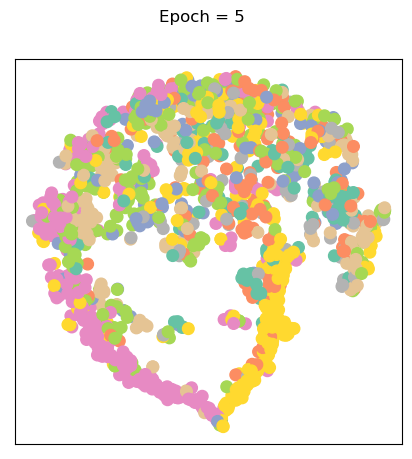

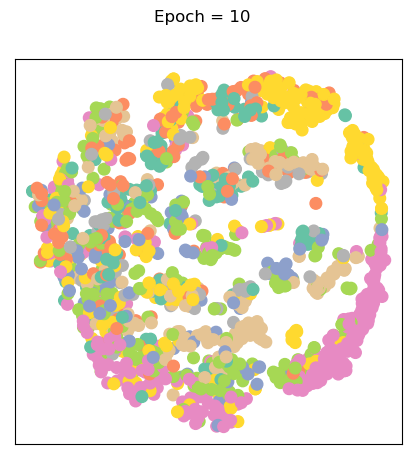

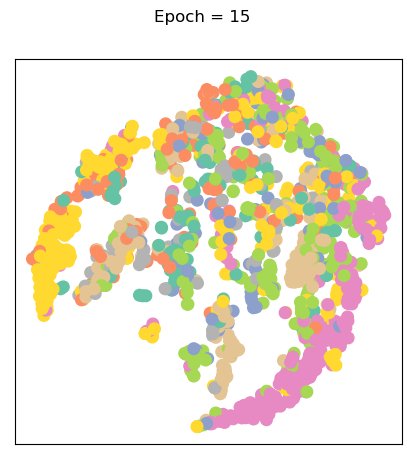

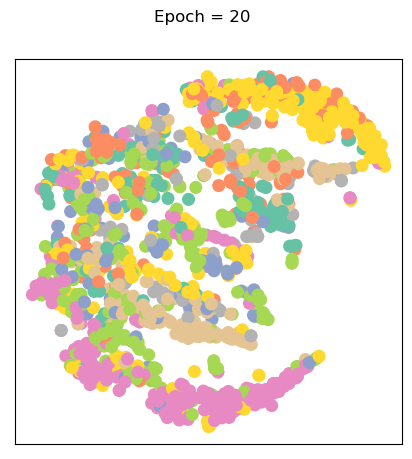

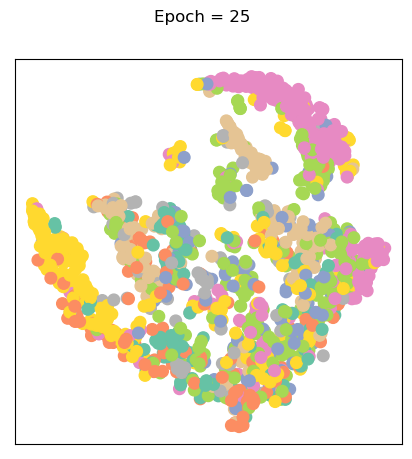

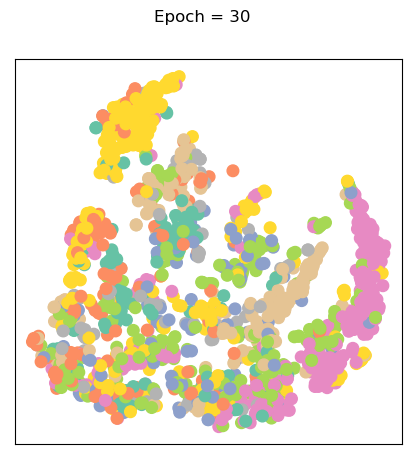

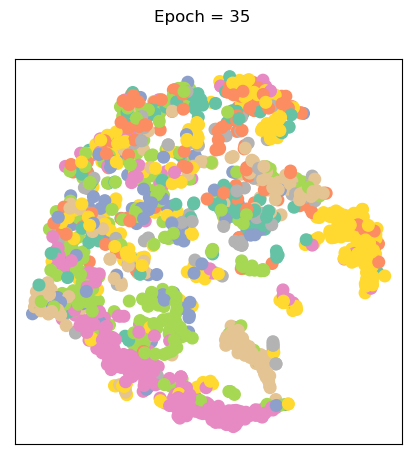

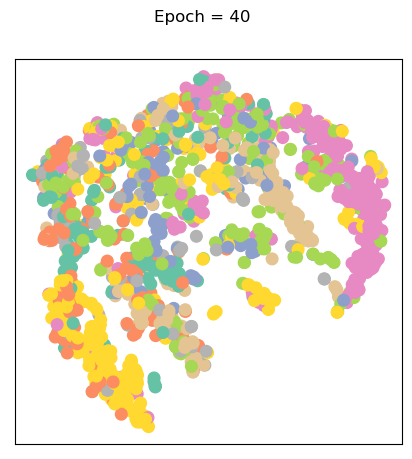

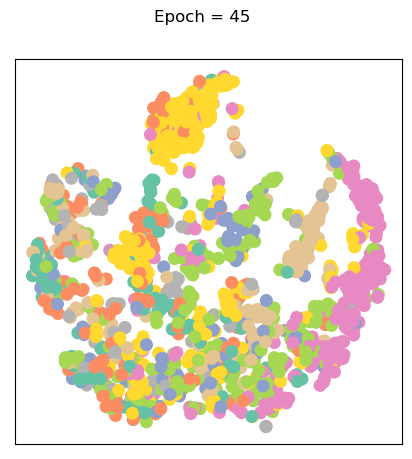

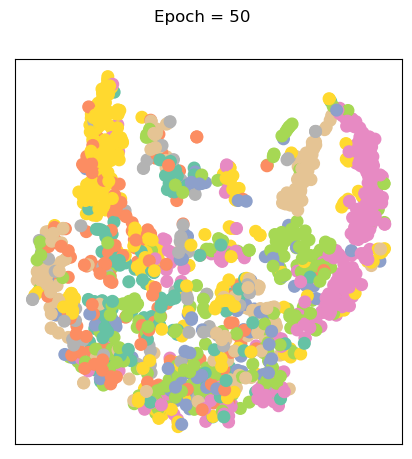

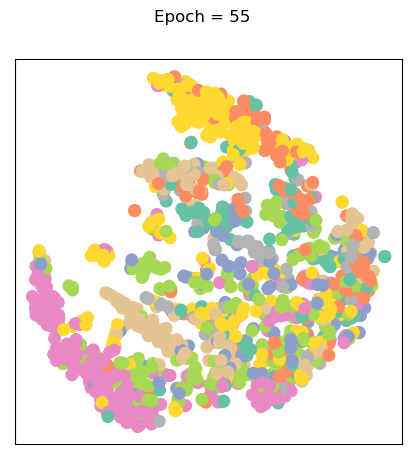

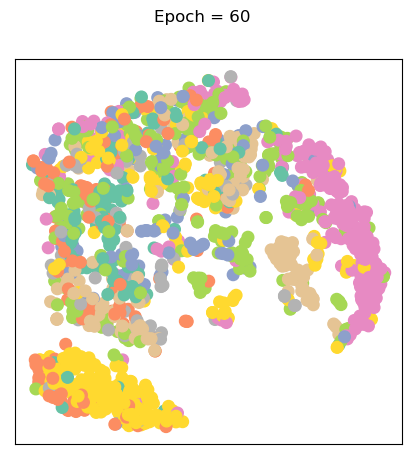

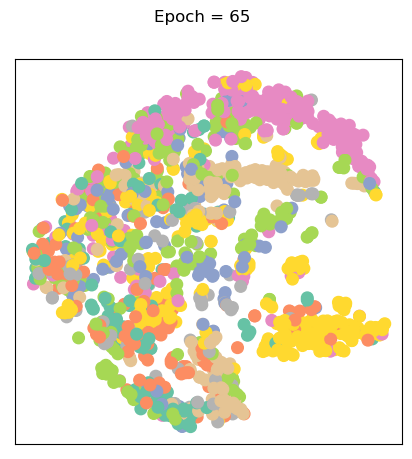

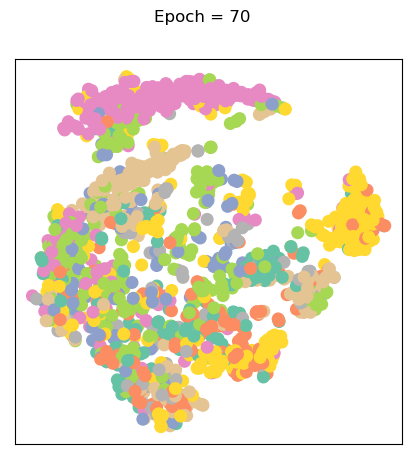

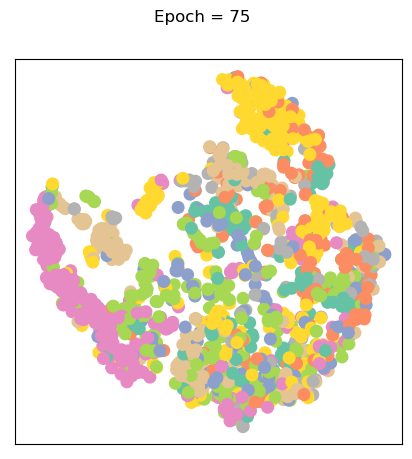

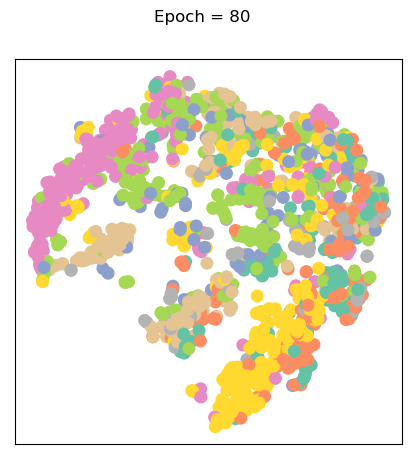

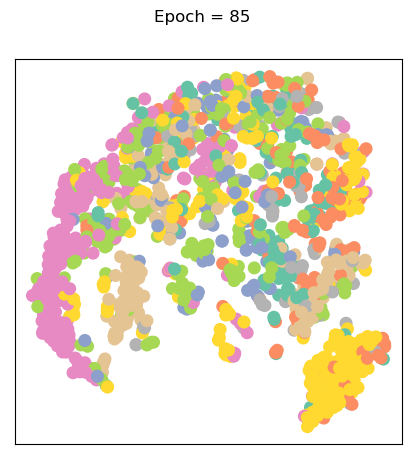

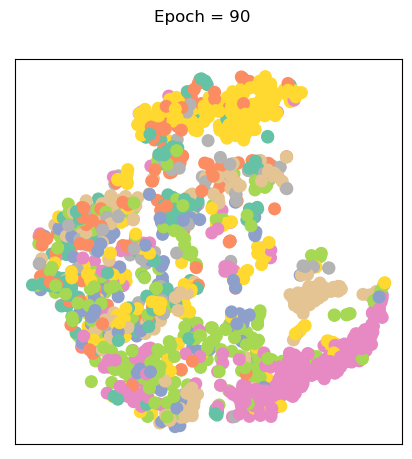

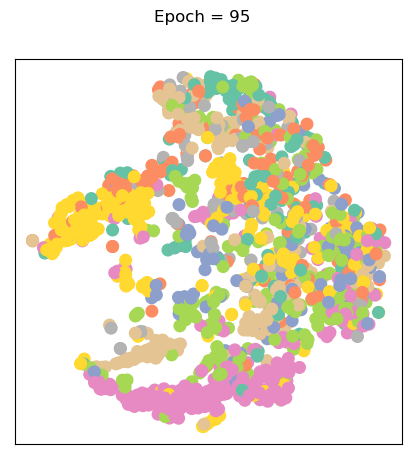

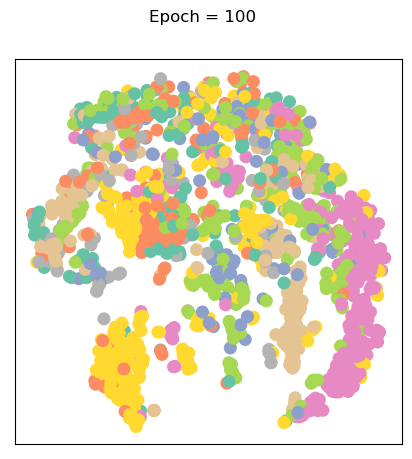

In [29]:
if 'IS_GRADESCOPE_ENV' not in os.environ:
  # reset the parameters to initial random value
    model.reset_parameters()
    optimizer = torch.optim.Adam(model.parameters(), lr=args['lr'])
    loss_fn = F.nll_loss

    best_model = None
    best_valid_acc = 0
    images = []

    for epoch in range(1, 1 + args["epochs"]):
        loss, out = train(model, data, train_idx, optimizer, loss_fn)
        if epoch % 5 == 0:
            images.append(visualize(out, color=data.y, epoch=epoch))
        result = test(model, data, split_idx, evaluator)
        train_acc, valid_acc, test_acc = result
        if valid_acc > best_valid_acc:
            best_valid_acc = valid_acc
            best_model = copy.deepcopy(model)
        print(f'Epoch: {epoch:02d}, '
              f'Loss: {loss:.4f}, '
              f'Train: {100 * train_acc:.2f}%, '
              f'Valid: {100 * valid_acc:.2f}% '
              f'Test: {100 * test_acc:.2f}%')

In [30]:
from moviepy.editor import ImageSequenceClip
fps = 1
filename = "embeddings.gif"
clip = ImageSequenceClip(images, fps=fps)
clip.write_gif(filename, fps=fps)

MoviePy - Building file embeddings.gif with imageio.


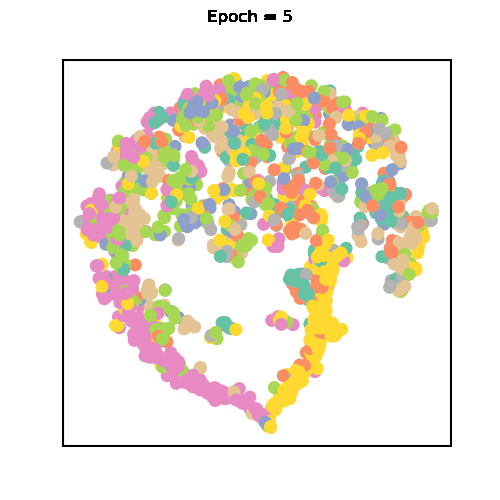

In [31]:
from IPython.display import Image
with open('embeddings.gif','rb') as f:
    display(Image(data=f.read(), format='png'))

## Question 5: What are your `best_model` validation and test accuracies?(20 points)

Run the cell below to see the results of your best of model and save your model's predictions to a file named *ogbn-arxiv_node.csv*. 

You can view this file by clicking on the *Folder* icon on the left side pannel. As in Colab 1, when you sumbit your assignment, you will have to download this file and attatch it to your submission.

In [32]:
if 'IS_GRADESCOPE_ENV' not in os.environ:
  best_result = test(best_model, data, split_idx, evaluator, save_model_results=True)
  train_acc, valid_acc, test_acc = best_result
  print(f'Best model: '
        f'Train: {100 * train_acc:.2f}%, '
        f'Valid: {100 * valid_acc:.2f}% '
        f'Test: {100 * test_acc:.2f}%')

Saving Model Predictions
Best model: Train: 74.08%, Valid: 72.18% Test: 71.53%


In [33]:
import torch_geometric
best_model.eval()
out = best_model(data.x, data.adj_t)
y_pred = out.argmax(dim=-1, keepdim=True)


In [34]:
torch.cuda.empty_cache()

# 4) GNN: Graph Property Prediction

In this section we will create a graph neural network for graph property prediction (graph classification).


## Load and preprocess the dataset

In [35]:
from ogb.graphproppred import PygGraphPropPredDataset, Evaluator
from torch_geometric.data import DataLoader
from tqdm.notebook import tqdm

if 'IS_GRADESCOPE_ENV' not in os.environ:
  # Load the dataset 
  dataset = PygGraphPropPredDataset(name='ogbg-molhiv')

  device = 'cuda' if torch.cuda.is_available() else 'cpu'
  print('Device: {}'.format(device))

  split_idx = dataset.get_idx_split()

  # Check task type
  print('Task type: {}'.format(dataset.task_type))

Device: cuda
Task type: binary classification


In [36]:
# Load the dataset splits into corresponding dataloaders
# We will train the graph classification task on a batch of 32 graphs
# Shuffle the order of graphs for training set
if 'IS_GRADESCOPE_ENV' not in os.environ:
  train_loader = DataLoader(dataset[split_idx["train"]], batch_size=32, shuffle=True, num_workers=0)
  valid_loader = DataLoader(dataset[split_idx["valid"]], batch_size=32, shuffle=False, num_workers=0)
  test_loader = DataLoader(dataset[split_idx["test"]], batch_size=32, shuffle=False, num_workers=0)

In [37]:
if 'IS_GRADESCOPE_ENV' not in os.environ:
  # Please do not change the args
  args = {
      'device': device,
      'num_layers': 5,
      'hidden_dim': 256,
      'dropout': 0.5,
      'lr': 0.001,
      'epochs': 30,
  }
  args

## Graph Prediction Model

### Graph Mini-Batching
Before diving into the actual model, we introduce the concept of mini-batching with graphs. In order to parallelize the processing of a mini-batch of graphs, PyG combines the graphs into a single disconnected graph data object (*torch_geometric.data.Batch*). *torch_geometric.data.Batch* inherits from *torch_geometric.data.Data* (introduced earlier) and contains an additional attribute called `batch`. 

The `batch` attribute is a vector mapping each node to the index of its corresponding graph within the mini-batch:

    batch = [0, ..., 0, 1, ..., n - 2, n - 1, ..., n - 1]

This attribute is crucial for associating which graph each node belongs to and can be used to e.g. average the node embeddings for each graph individually to compute graph level embeddings. 



### Implemention
Now, we have all of the tools to implement a GCN Graph Prediction model!  

We will reuse the existing GCN model to generate `node_embeddings` and then use  `Global Pooling` over the nodes to create graph level embeddings that can be used to predict properties for the each graph. Remeber that the `batch` attribute will be essential for performining Global Pooling over our mini-batch of graphs.

In [ ]:
from ogb.graphproppred.mol_encoder import AtomEncoder
from torch_geometric.nn import global_add_pool, global_mean_pool

### GCN to predict graph property
class GCN_Graph(torch.nn.Module):
    def __init__(self, hidden_dim, output_dim, num_layers, dropout):
        super(GCN_Graph, self).__init__()

        # Load encoders for Atoms in molecule graphs
        self.node_encoder = AtomEncoder(hidden_dim)

        # Node embedding model
        # Note that the input_dim and output_dim are set to hidden_dim
        self.gnn_node = GCN(hidden_dim, hidden_dim,
            hidden_dim, num_layers, dropout, return_embeds=True)

        self.pool = None

        ############# Your code here ############
        ## Note:
        ## 1. Initialize self.pool as a global mean pooling layer
        ## For more information please refer to the documentation:
        ## https://pytorch-geometric.readthedocs.io/en/latest/modules/nn.html#global-pooling-layers
        self.pool = global_mean_pool
        #########################################

        # Output layer
        self.linear = torch.nn.Linear(hidden_dim, output_dim)


    def reset_parameters(self):
        self.gnn_node.reset_parameters()
        self.linear.reset_parameters()

    def forward(self, batched_data):
        # TODO: Implement a function that takes as input a 
        # mini-batch of graphs (torch_geometric.data.Batch) and 
        # returns the predicted graph property for each graph. 
        #
        # NOTE: Since we are predicting graph level properties,
        # your output will be a tensor with dimension equaling
        # the number of graphs in the mini-batch

    
        # Extract important attributes of our mini-batch
        x, edge_index, batch = batched_data.x, batched_data.edge_index, batched_data.batch
        embed = self.node_encoder(x)

        out = None

        ############# Your code here ############
        ## Note:
        ## 1. Construct node embeddings using existing GCN model
        ## 2. Use the global pooling layer to aggregate features for each individual graph
        ## For more information please refer to the documentation:
        ## https://pytorch-geometric.readthedocs.io/en/latest/modules/nn.html#global-pooling-layers
        ## 3. Use a linear layer to predict each graph's property
        ## (~3 lines of code)
        out = self.gnn_node(embed, edge_index)
        out = self.pool(out, batch)
        out = self.linear(out)
        #########################################

        return out

In [ ]:
def train(model, device, data_loader, optimizer, loss_fn):
    # TODO: Implement a function that trains your model by 
    # using the given optimizer and loss_fn.
    model.train()
    loss = 0

    for step, batch in enumerate(tqdm(data_loader, desc="Iteration")):
      batch = batch.to(device)

      if batch.x.shape[0] == 1 or batch.batch[-1] == 0:
          pass
      else:
        ## ignore nan targets (unlabeled) when computing training loss.
        is_labeled = batch.y == batch.y

        ############# Your code here ############
        ## Note:
        ## 1. Zero grad the optimizer
        ## 2. Feed the data into the model
        ## 3. Use `is_labeled` mask to filter output and labels
        ## 4. You may need to change the type of label to torch.float32
        ## 5. Feed the output and label to the loss_fn
        ## (~3 lines of code)
        optimizer.zero_grad()
        pred = model(batch)        
        loss = loss_fn(pred[is_labeled],batch.y[is_labeled].float())

        #########################################

        loss.backward()
        optimizer.step()

    return loss.item()

In [ ]:
# The evaluation function
def eval(model, device, loader, evaluator, save_model_results=False, save_file=None):
    model.eval()
    y_true = []
    y_pred = []

    for step, batch in enumerate(tqdm(loader, desc="Iteration")):
        batch = batch.to(device)

        if batch.x.shape[0] == 1:
            pass
        else:
            with torch.no_grad():
                pred = model(batch)

            y_true.append(batch.y.view(pred.shape).detach().cpu())
            y_pred.append(pred.detach().cpu())

    y_true = torch.cat(y_true, dim = 0).numpy()
    y_pred = torch.cat(y_pred, dim = 0).numpy()

    input_dict = {"y_true": y_true, "y_pred": y_pred}

    if save_model_results:
        print ("Saving Model Predictions")
        
        # Create a pandas dataframe with a two columns
        # y_pred | y_true
        data = {}
        data['y_pred'] = y_pred.reshape(-1)
        data['y_true'] = y_true.reshape(-1)

        df = pd.DataFrame(data=data)
        # Save to csv
        df.to_csv('ogbg-molhiv_graph_' + save_file + '.csv', sep=',', index=False)

    return evaluator.eval(input_dict)

In [ ]:
if 'IS_GRADESCOPE_ENV' not in os.environ:
  model = GCN_Graph(args['hidden_dim'],
              dataset.num_tasks, args['num_layers'],
              args['dropout']).to(device)
  evaluator = Evaluator(name='ogbg-molhiv')

In [ ]:
import copy

if 'IS_GRADESCOPE_ENV' not in os.environ:
  model.reset_parameters()

  optimizer = torch.optim.Adam(model.parameters(), lr=args['lr'])
  loss_fn = torch.nn.BCEWithLogitsLoss()

  best_model = None
  best_valid_acc = 0

  for epoch in range(1, 1 + args["epochs"]):
    print('Training...')
    loss = train(model, device, train_loader, optimizer, loss_fn)

    print('Evaluating...')
    train_result = eval(model, device, train_loader, evaluator)
    val_result = eval(model, device, valid_loader, evaluator)
    test_result = eval(model, device, test_loader, evaluator)

    train_acc, valid_acc, test_acc = train_result[dataset.eval_metric], val_result[dataset.eval_metric], test_result[dataset.eval_metric]
    if valid_acc > best_valid_acc:
        best_valid_acc = valid_acc
        best_model = copy.deepcopy(model)
    print(f'Epoch: {epoch:02d}, '
          f'Loss: {loss:.4f}, '
          f'Train: {100 * train_acc:.2f}%, '
          f'Valid: {100 * valid_acc:.2f}% '
          f'Test: {100 * test_acc:.2f}%')

## Question 6: What are your `best_model` validation and test ROC-AUC scores? (20 points)

Run the cell below to see the results of your best of model and save your model's predictions over the validation and test datasets. The resulting files are named *ogbn-arxiv_graph_valid.csv* and *ogbn-arxiv_graph_test.csv*. 

Again, you can view these files by clicking on the *Folder* icon on the left side pannel. As in Colab 1, when you sumbit your assignment, you will have to download these files and attatch them to your submission.

In [ ]:
if 'IS_GRADESCOPE_ENV' not in os.environ:
  train_acc = eval(best_model, device, train_loader, evaluator)[dataset.eval_metric]
  valid_acc = eval(best_model, device, valid_loader, evaluator, save_model_results=True, save_file="valid")[dataset.eval_metric]
  test_acc  = eval(best_model, device, test_loader, evaluator, save_model_results=True, save_file="test")[dataset.eval_metric]

  print(f'Best model: '
      f'Train: {100 * train_acc:.2f}%, '
      f'Valid: {100 * valid_acc:.2f}% '
      f'Test: {100 * test_acc:.2f}%')

In [ ]:
torch.cuda.empty_cache()

## Question 7 (Optional): Experiment with the two other global pooling layers in Pytorch Geometric.

# Submission

You will need to submit four files on Gradescope to complete this notebook. 

1.   Your completed *CS224W_Colab2.ipynb*. From the "File" menu select "Download .ipynb" to save a local copy of your completed Colab. **PLEASE DO NOT CHANGE THE NAME!** The autograder depends on the .ipynb file being called "CS224W_Colab2.ipynb".
2.  *ogbn-arxiv_node.csv* 
3.  *ogbg-molhiv_graph_valid.csv*
4.  *ogbg-molhiv_graph_test.csv*

Download the csv files by selecting the *Folder* icon on the left panel. 

To submit your work, zip the files downloaded in steps 1-4 above and submit to gradescope. **NOTE:** DO NOT rename any of the downloaded files. 